<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Ridge_Regression(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ridge Regression Explained

### 1. What is Ridge Regression?

Ridge Regression is a modified version of Linear Regression that adds a penalty to prevent overfitting.

In simple terms:

It reduces the size of model coefficients to make the model more stable and generalize better.

It is especially useful when:

*   There is multicollinearity (features are highly correlated)
*   Number of features is large
*   Model is overfitting

### 2. Cost Function

Normal Linear Regression minimizes:

$Loss = \sum (y_i - \hat{y}_i)^2$

Ridge Regression adds L2 penalty:

$Loss = \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_j^2$

Where:

*   $w_j$ = coefficients
*   $\lambda$ (alpha) = regularization strength

Effect of $\lambda$:

| $\lambda$ value | Effect
|---|---
| 0 | Same as Linear Regression
| Small | Slight shrinkage
| Large | Coefficients shrink towards 0

Note: Ridge never makes coefficients exactly zero.

### 3. Why Ridge Works (Bias–Variance Idea)

*   Without regularization → Low bias, High variance (overfitting)
*   With Ridge → Slightly higher bias, much lower variance

Result → Better performance on unseen data

### 4. When to Use Ridge?

Use Ridge when:

*   Features are correlated
*   All features are important
*   You don’t want feature selection, only shrinkage
*   Dataset has many features

If you want some coefficients exactly zero → use Lasso.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate sample data
np.random.seed(42)
X = 5 * np.random.rand(100, 1)
y = 3*X.squeeze() + np.random.randn(100)*2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Ridge Regression
ridge = Ridge(alpha=10)   # lambda = 10
ridge.fit(X_train, y_train)

# Predictions
y_lr = lr.predict(X_test)
y_ridge = ridge.predict(X_test)

print("Linear R2:", r2_score(y_test, y_lr))
print("Ridge R2:", r2_score(y_test, y_ridge))


Linear R2: 0.8319681008283544
Ridge R2: 0.8297295632823403


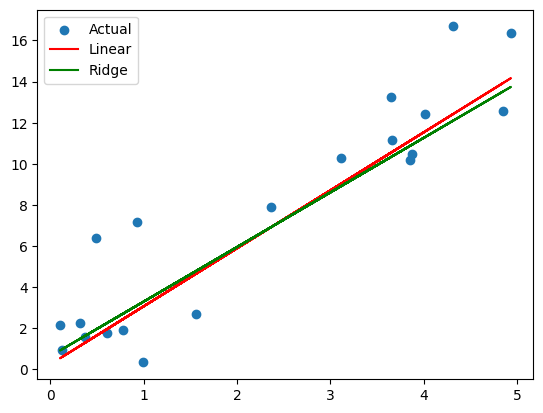

In [8]:
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_lr, color='red', label="Linear")
plt.plot(X_test, y_ridge, color='green', label="Ridge")
plt.legend()
plt.show()


In [9]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)


Best alpha: 1.0


#Ridge Regression from Scratch using Gradient Descent (L2)

### 1. Ridge Cost Function

Ridge minimizes:

$J = \frac{1}{n} \sum (y - \hat{y})^2 + \lambda \sum w^2$

Gradient formulas:

For weights:

$\frac{\partial J}{\partial w} = -\frac{2}{n} X^T (y - \hat{y}) + 2\lambda w$

For bias (no regularization):

$\frac{\partial J}{\partial b} = -\frac{2}{n} \sum (y - \hat{y})$

Update rule:

In [10]:
import numpy as np

class RidgeGD:
    def __init__(self, lr=0.01, epochs=1000, alpha=1.0):
        self.lr = lr
        self.epochs = epochs
        self.alpha = alpha   # lambda
        self.coef_ = None
        self.intercept_ = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize parameters
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.epochs):
            y_pred = X.dot(self.coef_) + self.intercept_
            error = y - y_pred

            # gradients
            dw = (-2/n_samples) * (X.T.dot(error)) + 2*self.alpha*self.coef_
            db = (-2/n_samples) * np.sum(error)

            # update
            self.coef_ -= self.lr * dw
            self.intercept_ -= self.lr * db

            # loss
            loss = np.mean(error**2) + self.alpha*np.sum(self.coef_**2)
            self.loss_history.append(loss)

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_


### Explanation of the `RidgeGD` Class

This `RidgeGD` class implements Ridge Regression from scratch using Gradient Descent. Let's break down its components:

*   **`__init__(self, lr=0.01, epochs=1000, alpha=1.0)`**: This is the constructor for the class. It initializes the hyperparameters:
    *   `lr`: Learning rate, which controls the step size during gradient descent.
    *   `epochs`: The number of iterations the gradient descent algorithm will run.
    *   `alpha`: The regularization strength (equivalent to $\lambda$ in the cost function).
    It also initializes `coef_` (weights) and `intercept_` (bias) to `None`, and `loss_history` to an empty list to store the loss at each epoch.

*   **`fit(self, X, y)`**: This method trains the Ridge Regression model.
    *   `n_samples, n_features = X.shape`: Gets the number of samples and features from the input data `X`.
    *   `self.coef_ = np.zeros(n_features)` and `self.intercept_ = 0`: Initializes the model's weights and bias to zeros.
    *   The `for` loop runs for `epochs` iterations, performing the gradient descent steps:
        *   `y_pred = X.dot(self.coef_) + self.intercept_`: Calculates the predicted values ($\hat{y}$).
        *   `error = y - y_pred`: Calculates the prediction error.
        *   **Gradients Calculation**:
            *   `dw = (-2/n_samples) * (X.T.dot(error)) + 2*self.alpha*self.coef_`: Calculates the gradient of the cost function with respect to the weights. It includes the original linear regression gradient plus the gradient of the L2 regularization term ($2\lambda w$).
            *   `db = (-2/n_samples) * np.sum(error)`: Calculates the gradient of the cost function with respect to the bias (note: the bias term is not regularized).
        *   **Parameters Update**:
            *   `self.coef_ -= self.lr * dw`: Updates the weights by moving in the opposite direction of the gradient, scaled by the learning rate.
            *   `self.intercept_ -= self.lr * db`: Updates the bias similarly.
        *   **Loss Calculation**:
            *   `loss = np.mean(error**2) + self.alpha*np.sum(self.coef_**2)`: Calculates the mean squared error (MSE) with the L2 regularization term added. This loss is appended to `loss_history`.

*   **`predict(self, X)`**: This method makes predictions on new data `X` using the learned coefficients and intercept.

In [11]:
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
X = 5 * np.random.rand(100,1)
y = 4 + 3*X.squeeze() + np.random.randn(100)*2

# Train model
ridge = RidgeGD(lr=0.01, epochs=1000, alpha=10)
ridge.fit(X, y)

print("Coefficient:", ridge.coef_)
print("Intercept:", ridge.intercept_)


Coefficient: [0.50599852]
Intercept: 9.860988617380853


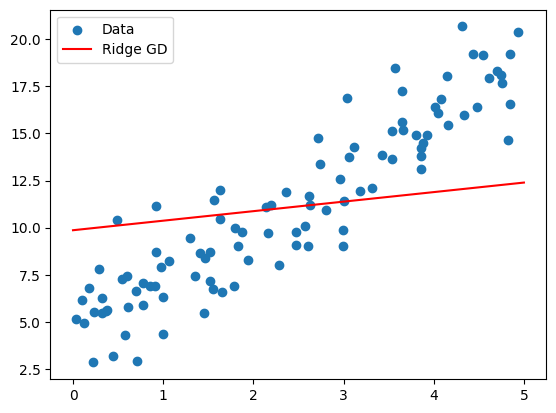

In [12]:
plt.scatter(X, y, label="Data")

X_line = np.linspace(0,5,100).reshape(-1,1)
y_line = ridge.predict(X_line)

plt.plot(X_line, y_line, color='red', label="Ridge GD")
plt.legend()
plt.show()


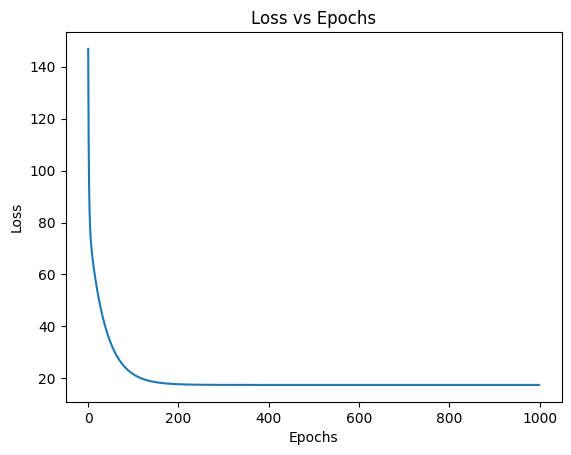

In [13]:
plt.plot(ridge.loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [14]:
for a in [0, 1, 10, 100]:
    model = RidgeGD(lr=0.01, epochs=1000, alpha=a)
    model.fit(X, y)
    print(f"Alpha={a}, Coef={model.coef_[0]:.3f}")


Alpha=0, Coef=2.822
Alpha=1, Coef=1.935
Alpha=10, Coef=0.506
Alpha=100, Coef=-159110368601042842588468226880891146039022917792850944286785536.000


#Program 1

In [15]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression


In [16]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

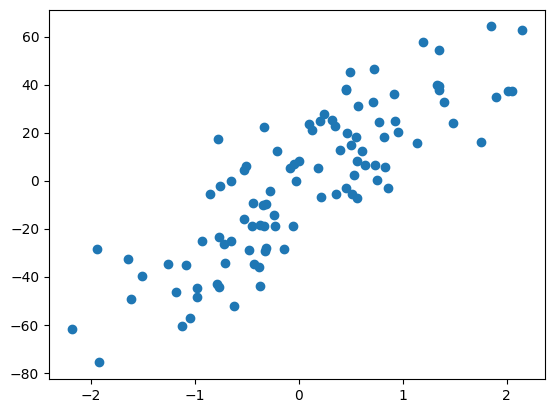

In [17]:
plt.scatter(X,y)
plt.show()

In [18]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [19]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [20]:
rr1=Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


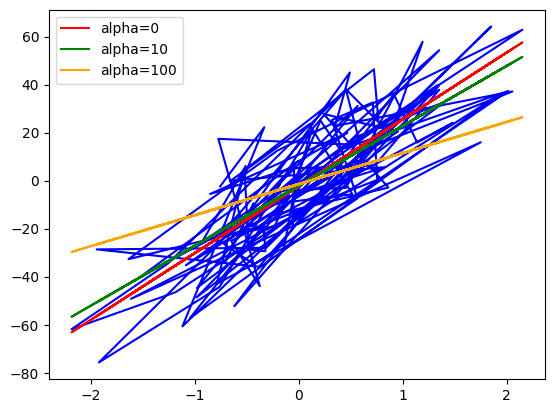

In [21]:
plt.plot(X,y,'b')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

#Program 2

In [43]:
class MeraRidge1:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.m=None
    self.b=None
  def fit(self,X_train,y_train):
    num=0
    den=0
    for i in range(X_train.shape[0]):
      num=num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
      den=den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
    self.m=num/(den + self.alpha)
    self.b=y_train.mean() - (self.m*X_train.mean())
    print(self.m)
    print(self.b)
  def predict(self,X_test):
    pass

In [44]:
reg=MeraRidge1(alpha=10)

In [45]:
reg.fit(X,y)

[ 27.65300678   6.33775961  86.3122964   64.97620541  31.20495017
  25.61678121 -58.1041163   63.35300274  83.28521587  56.2929837 ]
[152.13348416 152.13348416 152.13348416 152.13348416 152.13348416
 152.13348416 152.13348416 152.13348416 152.13348416 152.13348416]


In [46]:
reg=MeraRidge1(alpha=100)

In [47]:
reg.fit(X,y)

[ 3.01171361  0.69025105  9.40034911  7.07661643  3.39855893  2.78994647
 -6.32817108  6.89983198  9.07066707  6.13091902]
[152.13348416 152.13348416 152.13348416 152.13348416 152.13348416
 152.13348416 152.13348416 152.13348416 152.13348416 152.13348416]


#Program 3

#1. Complete MeraRidge (n-Dimensional)

In [48]:
import numpy as np

class MeraRidge2:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        n_samples, n_features = X_train.shape

        # Add bias column
        X = np.c_[np.ones((n_samples, 1)), X_train]

        # Identity matrix
        I = np.eye(n_features + 1)
        I[0, 0] = 0   # Do not regularize intercept

        # Ridge closed form
        beta = np.linalg.inv(X.T @ X + self.alpha * I) @ (X.T @ y_train)

        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, X_test):
        X_test = np.array(X_test)
        return X_test @ self.coef_ + self.intercept_


### Explanation of the `MeraRidge` Class

This `MeraRidge` class implements Ridge Regression using its closed-form (analytical) solution. Let's break down its components:

*   **`__init__(self, alpha=0.1)`**: This is the constructor for the class. It initializes the hyperparameter:
    *   `alpha`: The regularization strength (equivalent to $\lambda$ in the Ridge cost function).
    It also initializes `coef_` (weights) and `intercept_` (bias) to `None`, which will be learned during the `fit` process.

*   **`fit(self, X_train, y_train)`**: This method trains the Ridge Regression model using the closed-form solution.
    *   `X_train = np.array(X_train)` and `y_train = np.array(y_train)`: Ensures the input data is in NumPy array format.
    *   `n_samples, n_features = X_train.shape`: Gets the number of samples and features from the training data.
    *   `X = np.c_[np.ones((n_samples, 1)), X_train]`: This crucial step adds a column of ones to the `X_train` matrix. This is done to incorporate the intercept (bias) term into the weight vector, allowing it to be solved simultaneously with the other feature coefficients. The modified design matrix `X` now has `n_features + 1` columns.
    *   `I = np.eye(n_features + 1)`: Creates an identity matrix of size `(n_features + 1) x (n_features + 1)`. This matrix is used in the regularization term.
    *   `I[0, 0] = 0`: This sets the first element of the identity matrix to 0. This is because the intercept term (which corresponds to the first column of `X` and the first element of the `beta` vector) is typically *not* regularized in Ridge Regression. Only the coefficients associated with the actual features are penalized.
    *   **Ridge closed form calculation**: `beta = np.linalg.inv(X.T @ X + self.alpha * I) @ (X.T @ y_train)`
        This is the core of the closed-form solution for Ridge Regression. The formula is:
        $ \hat{\beta} = (X^T X + \lambda I)^{-1} X^T y $
        Where:
        *   `X` is the design matrix (with the intercept column).
        *   `X.T` is the transpose of `X`.
        *   `@` denotes matrix multiplication.
        *   `np.linalg.inv()` calculates the inverse of a matrix.
        *   `self.alpha` is $\lambda$.
        *   `I` is the modified identity matrix for regularization.
        This equation directly calculates the optimal `beta` coefficients (including the intercept) that minimize the Ridge cost function.
    *   `self.intercept_ = beta[0]` and `self.coef_ = beta[1:]`: The first element of the calculated `beta` vector is assigned to the `intercept_`, and the remaining elements are assigned to `coef_` (the feature weights).

*   **`predict(self, X_test)`**: This method makes predictions on new data `X_test` using the learned coefficients and intercept.
    *   `X_test = np.array(X_test)`: Ensures the input data is a NumPy array.
    *   `return X_test @ self.coef_ + self.intercept_`: Calculates the predicted `y` values using the standard linear model equation: $ \hat{y} = X_{test} \beta + b $

2. Use with Diabetes Dataset

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
X, y = load_diabetes(return_X_y=True)

print("Shape of X:", X.shape)   # (442, 10)
print("Number of features:", X.shape[1])


Shape of X: (442, 10)
Number of features: 10


3. Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


4. Train Your Ridge

In [49]:
model = MeraRidge2(alpha=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R2 Score (MeraRidge):", r2_score(y_test, y_pred))


Intercept: 151.29748677566113
Coefficients: [  48.81261163  -85.49430983  270.22640536  201.91604765   17.41348052
  -19.04307488 -136.47735722  122.26517107  247.59846265   95.59879746]
R2 Score (MeraRidge): 0.4093881140127431


5. Compare with sklearn Ridge

In [31]:
from sklearn.linear_model import Ridge

sk_model = Ridge(alpha=1)
sk_model.fit(X_train, y_train)

y_pred_sk = sk_model.predict(X_test)

print("\nSklearn Intercept:", sk_model.intercept_)
print("Sklearn Coefficients:", sk_model.coef_)
print("R2 Score (Sklearn):", r2_score(y_test, y_pred_sk))



Sklearn Intercept: 152.241675211113
Sklearn Coefficients: [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
R2 Score (Sklearn): 0.41915292635986545


6. Effect of Alpha (Important)

In [32]:
for a in [0, 0.1, 1, 10, 100]:
    model = MeraRidge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Alpha={a}, R2={r2_score(y_test, y_pred):.4f}")


Alpha=0, R2=0.4526
Alpha=0.1, R2=0.4609
Alpha=1, R2=0.4192
Alpha=10, R2=0.1612
Alpha=100, R2=0.0122


7. Visualize Coefficient Shrinkage

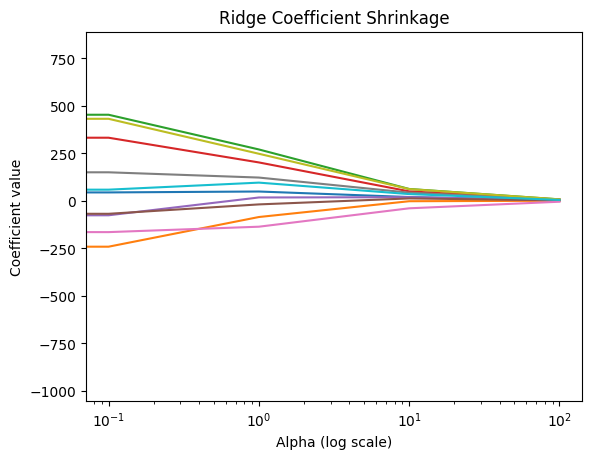

In [50]:
import matplotlib.pyplot as plt

alphas = [0, 0.1, 1, 10, 100]
coefs = []

for a in alphas:
    model = MeraRidge2(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

coefs = np.array(coefs)

for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i])

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient value")
plt.title("Ridge Coefficient Shrinkage")
plt.show()


#Program 4

In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(0)
X = np.random.randn(200, 6)
true_coef = np.array([3.2, -1.5, 0.7, 0, 2.8, -0.5])
y = X.dot(true_coef) + np.random.randn(200) * 0.6

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_basic = ridge.predict(X_test)

print("MSE (alpha = 1.0):", mean_squared_error(y_test, pred_basic))
print("Coefficients (alpha = 1.0):", ridge.coef_)
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 500]}
grid = GridSearchCV(Ridge(), param_grid, cv=5,
                    scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)
best_ridge = grid.best_estimator_
pred_best = best_ridge.predict(X_test)

print("Best alpha selected:", grid.best_params_["alpha"])
print("MSE (best alpha):", mean_squared_error(y_test, pred_best))
print("Coefficients (best alpha):", best_ridge.coef_)

MSE (alpha = 1.0): 0.45980230236924924
Coefficients (alpha = 1.0): [ 2.96587537 -1.64397225  0.66532484  0.06289239  2.83625348 -0.46900939]
Best alpha selected: 0.001
MSE (best alpha): 0.45099557660691597
Coefficients (best alpha): [ 2.9849965  -1.65395975  0.67045849  0.06557375  2.85454007 -0.47306529]


#Program 5

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score


In [36]:
X,y=load_diabetes(return_X_y=True)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [38]:
reg=Ridge(alpha=0.1,solver='cholesky')

In [39]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [40]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [41]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


Using class

In [55]:
class MeraRidge3:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.coef_=None
    self.intercept_=None
  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)
    I=np.identity(X_train.shape[1])
    I[0][0]=0
    result=np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha* I).dot(X_train.T).dot(y_train)
    self.intercept_=result[0]
    self.coef_=result[1:]

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [56]:
reg=MeraRidge3()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281
